In [1]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.layers import Layer
from tensorflow.keras.initializers import RandomUniform


import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('tensorflow:', tf.__version__)
print('keras:', keras.__version__)

tensorflow: 2.8.2
keras: 2.8.0


In [2]:
# Data

num_of_data = 2000
# reminder: ground truth data
x = np.linspace(-np.pi, np.pi, num_of_data)
y = np.sin(x)

In [3]:
# quick look at Layer
# myLayer
class CustomLayer(Layer):
    def __init__(self, poly_degree=3, **kwargs):
        self._poly_degree = poly_degree
        super(CustomLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Add parameters
        self.params = self.add_weight(name = 'custom_layer',
                                      shape = (self._poly_degree + 1,),
                                      initializer = RandomUniform(minval=-10.0, maxval=10.0, seed=None),
                                      trainable = True
                                      )
        super(CustomLayer, self).build(input_shape)

    def call(self, x):
        y_pred = self.params[0] + self.params[1] * x + self.params[2] * x ** 2 + self.params[3] * x ** 3
        return y_pred


In [4]:
# Model

# y_pred = a + b * x + c * x ** 2 + d * x ** 3

myLayer = CustomLayer(poly_degree=3)

x_tensor = layers.Input(shape=(1,))
y_pred_tensor = myLayer(x_tensor)

model = keras.Model(inputs=[x_tensor], outputs=[y_pred_tensor])

# check structure of our model
model.summary()

# how to use model to predict values (before/after training)
init_y_pred = model.predict(x)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 custom_layer (CustomLayer)  (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Loss and Optimizer
model.compile(loss='mse', optimizer='rmsprop') # sgd, adam, rmsprop

In [6]:
# Training
model.fit(x, y, epochs=500, batch_size=100)

Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 4475.0659
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 4434.3374
Epoch 3/500
20/20 [==============================] - 0s 1ms/step - loss: 4398.0283
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 4362.1558
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 4325.8569
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 4290.1621
Epoch 7/500
20/20 [==============================] - 0s 1ms/step - loss: 4254.5425
Epoch 8/500
20/20 [==============================] - 0s 1ms/step - loss: 4219.5029
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 4184.7427
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 4149.3716
Epoch 11/500
20/20 [==============================] - 0s 2ms/step - loss: 4114.5981
Epoch 12/500
20/20 [==============================] - 0s 2ms/step - loss: 4079.6309
E

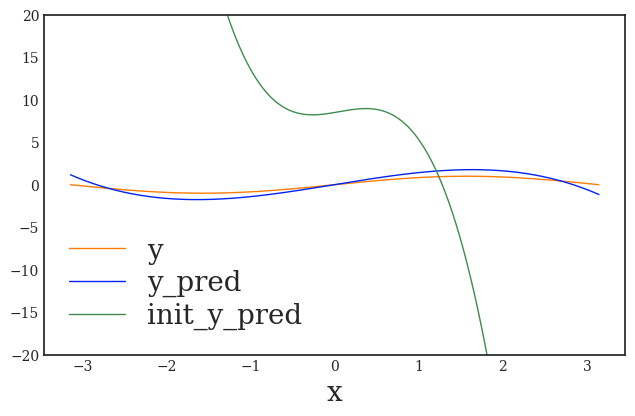

In [7]:
# Figure

def plot_figure(x, y, y_pred, old_y_pred):
    # figure configuration
    plt.style.use('seaborn-white')
    matplotlib.rcParams['figure.figsize'] = [7.5, 4.5]
    matplotlib.rcParams['font.family'] = "serif"
    # matplotlib.rcParams['font.serif'] = 'Times'
    matplotlib.rcParams["figure.dpi"] = 100
    matplotlib.rcParams['savefig.dpi'] = 200
    linewidth = 1

    # make a canvas
    fig, ax = plt.subplots()

    # draw lines

    # orange
    ax.plot(x, y, color='#fb7d07', label='y', linewidth=linewidth)

    # blue
    ax.plot(x, y_pred, color='#0023F5', label='y_pred', linewidth=linewidth)

    # green
    ax.plot(x, old_y_pred, color='#3E8C4E', label='init_y_pred', linewidth=linewidth)

    # Set labels
    plt.xlabel('x', fontsize=20)
    # Set legend
    ax.legend(loc=3, prop={'size': 20}, labelspacing=0.2)
    y_limit = 20.0
    plt.ylim(-y_limit, y_limit)

    plt.show()

# get new prediction after model is trained
y_pred = model.predict(x)

# plot the figure
plot_figure(x, y, y_pred, init_y_pred)
